In [27]:
#set variables

A = 202 # outgoing radiation
B = 1.9 # outgoing radiation
k = 1.2*B # transport parameter
s = lambda y: 1 - 0.482*(3*y**2 - 1)/2 # solar weighting
aw = 0.32 # water albedo
ai = 0.62 # ice albedo
Tc = -10.0 # critical temperature for ice formation
Q0 = 342.0 # solar constant (1370 W/m^2 divided by 4)
M = 40
ys = 0.94


In [28]:
# Define the albedo, 

a = lambda y: (ai+aw)/2 + ((ai-aw)/2)*np.tanh(M*(y-ys))

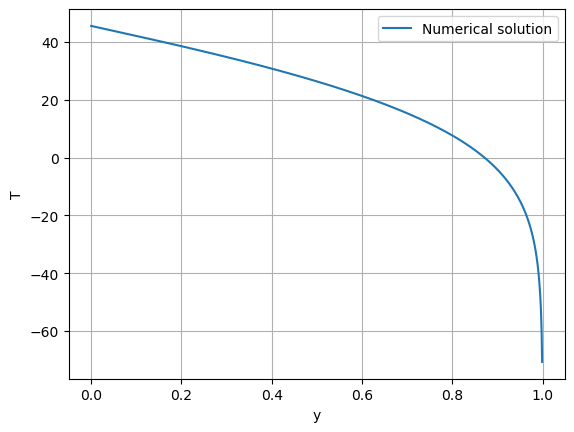

In [29]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt


def ode(y, T):
    #define ODE coeffs 
    alpha = k*(1-y**2)
    beta = 2*y*k
    delta = B
    gamma = Q0*s(y)*(1-a(y))  
    return np.vstack((T[1], (beta*T[1] + delta*T[0] + A -gamma)/alpha))

def bc(Ta, Tb):
    return np.array([Ta[0]-(Q0*s(0)*(1-a(0))-A)/B, Tb[0]-(Q0*s(1)*(1-a(1))-A)/B])  #change this for accuracy, only trvial case here


# Define initial mesh
y = np.linspace(0, 0.999)
T_guess = np.zeros((2, y.size))

# Solve the BVP
sol = solve_bvp(ode, bc, y, T_guess)

# Generate points for plotting
y_plot = np.linspace(0, 0.999, 1000)
T_plot = sol.sol(y_plot)[0]
c=5
#T_outer= -1/2 * c * (np.log(1-y_plot)-np.log(1+y_plot))
"""T_outer = np.exp(1/2)*np.exp(-y_plot/2))"""
#T_inner = (Q0*s(y_plot)*(1-a(y_plot))-A)/B

# Plot the solution
plt.plot(y_plot, T_plot, label='Numerical solution')
#plt.plot(y_plot, T_outer,'--')
#plt.plot(y_plot, T_outer, '--') #change this
#plt.plot(y_plot, T_inner, '--') #change this
plt.xlabel('y')
plt.ylabel('T')
plt.legend()
plt.grid(True)
plt.show()


#vary Q and look at bifurcation diagrams